<a href="https://colab.research.google.com/github/KhaNguyen04/ArtSharing/blob/main/ExtremeLearningMachine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
# Import library and dependencies
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
import scipy


In [105]:
# Connecting to Google Colab Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
# Loading and read file (change the file_path to the right file store)
file_path = "/content/drive/MyDrive/Colab Notebooks/Kwantx/AAPL_Updated.csv"
df = pd.read_csv(file_path) 
df.head(70)

,Date,Open,High,Low,Close
0,1/2/1996,0.246199,0.246199,0.242382,0.245245
1,1/3/1996,0.244291,0.250971,0.243337,0.245245
2,1/4/1996,0.247154,0.247154,0.239520,0.240951
3,1/5/1996,0.241428,0.261468,0.239520,0.261468
4,1/8/1996,0.263377,0.271010,0.259559,0.264331
...,...,...,...,...,...
65,4/3/1996,0.191806,0.191806,0.185722,0.187512
66,4/4/1996,0.187990,0.187990,0.183219,0.184173
67,4/8/1996,0.182264,0.187035,0.181310,0.186081
68,4/9/1996,0.189897,0.202303,0.186081,0.198486


In [107]:
# Function that select data accoring to data range
def data_date(date,days="start"):
  if date in df['Date'].values:
    index_end=df.loc[df['Date'] == date].index[0]
    if days=="start":
      index_start=0
    elif index_end-days<0:
        index_start=0
    else:
        index_start=index_end-days
    return df.loc[index_start:index_end]
  else:
    return None
input_date='4/8/1996'
df_select=data_date(input_date)
df_select

,Date,Open,High,Low,Close
0,1/2/1996,0.246199,0.246199,0.242382,0.245245
1,1/3/1996,0.244291,0.250971,0.243337,0.245245
2,1/4/1996,0.247154,0.247154,0.239520,0.240951
3,1/5/1996,0.241428,0.261468,0.239520,0.261468
4,1/8/1996,0.263377,0.271010,0.259559,0.264331
...,...,...,...,...,...
63,4/1/1996,0.191807,0.197533,0.187155,0.194670
64,4/2/1996,0.195624,0.195624,0.189898,0.190852
65,4/3/1996,0.191806,0.191806,0.185722,0.187512
66,4/4/1996,0.187990,0.187990,0.183219,0.184173


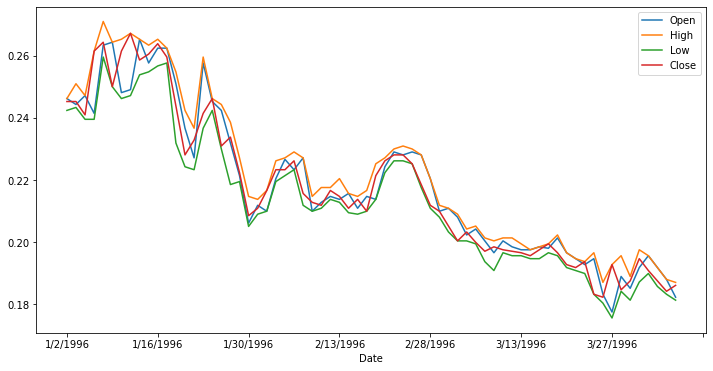

In [108]:
# Change index to Date column
df_graph = df_select.copy()
df_graph.set_index('Date',inplace=True)
df_graph.plot(figsize=(12,6))


In [139]:
# Normalize data
df_normalize=df_select.loc[:, df.columns!='Date']
for column in df_normalize.columns:
  df_normalize[column]=-1+2*(df_normalize[column]-df_normalize[column].min())/(df_normalize[column].max()-df_normalize[column].min())
df_normalize.insert(loc=0, column='Date', value=df['Date'])
min_target=min(df_normalize["Close"])
max_target=max(df_normalize["Close"])
df_normalize.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Date,Open,High,Low,Close
0,1/2/1996,0.565223,0.409084,0.590911,0.483145
1,1/3/1996,0.521747,0.522733,0.613637,0.483145
2,1/4/1996,0.586978,0.431828,0.522732,0.382025
3,1/5/1996,0.456532,0.772733,0.522731,0.865182
4,1/8/1996,0.956546,1.000000,1.000000,0.932603
5,1/9/1996,0.978281,0.840917,0.772740,0.595521
6,1/10/1996,0.608715,0.863636,0.681811,0.865182
7,1/11/1996,0.630448,0.909083,0.704553,1.000000
8,1/12/1996,1.000000,0.863623,0.863624,0.797737
9,1/15/1996,0.826096,0.818189,0.886367,0.842716


In [137]:
T= df_normalize["Close"]
T=T.to_numpy()
data_columns=df_normalize.loc[:, ~df.columns.isin(["Close","Date"])]
data_columns=data_columns.to_numpy()

trainX = []
trainY = []
n_future = 2 # time window we want to predict the future
n_past = 2 #time window of past date 
for i in range(n_past, len(data_columns) - n_future +1):
    trainX.append(data_columns[i - n_past:i, 0:data_columns.shape[1]])
    trainY.append(T[i :i + n_future])
trainX, trainY = np.array(trainX), np.array(trainY)
print
print(trainX[:5])  #first five value of  Open	High	Low	
print("Target array: ")
trainY[:5] #first five value Close price inpu

[[[0.5652227  0.40908392 0.59091101]
  [0.5217473  0.52273287 0.61363667]]

 [[0.5217473  0.52273287 0.61363667]
  [0.58697762 0.43182765 0.52273167]]

 [[0.58697762 0.43182765 0.52273167]
  [0.45653161 0.77273318 0.52273127]]

 [[0.45653161 0.77273318 0.52273127]
  [0.95654638 1.         1.        ]]

 [[0.95654638 1.         1.        ]
  [0.97828125 0.84091682 0.77274016]]]
Target array: 


array([[0.38202499, 0.8651815 ],
       [0.8651815 , 0.93260253],
       [0.93260253, 0.59552096],
       [0.59552096, 0.8651815 ],
       [0.8651815 , 1.        ]])

In [111]:
# Grey Correlation
T= df_normalize["Close"]
correlation_weights=[[] for _ in range(len(T))] #result  weights at position i, equation (7)
average_weights=[]                      #average weight of the features, equation (8)
def grey_correlation(feature, target,weights):
  differences=[]
  results=[]
  for i in range(len(target)):
    difference=abs(target.values[i]-feature.values[i])
    differences.append(difference)
    result=(min(differences)+0.5*max(differences))/(difference+0.5*max(differences))
    weights[i].append(result)
    results.append(result)
    # print(i,weights[i])
  # print(results)
  return sum(results)/len(results)
    # result=
feature_columns=df_normalize.loc[:, ~df.columns.isin(["Close","Date"])]
feature_names=feature_columns.columns
# print(feature_names)

for name in feature_names:
  average_weights.append(grey_correlation(df_normalize[name],T,correlation_weights))

average_weights


[0.6840061886452034, 0.7578572958318365, 0.6882512504387558]

In [112]:
input_values=np.multiply(feature_columns.values,average_weights) #value of input values array x
input_values.shape

(68, 3)

In [113]:
input_size =input_values.shape[1]
hidden_size = 1000  #can be change
#Randomize from (-.5,0.5)
input_weights=np.array([[np.random.uniform(-0.5, 0.5) for _ in range(hidden_size)] for i in range(input_size)])
biases = np.array([np.random.uniform(-0.5, 0.5) for _ in range(hidden_size)])    
#Gaussian distribution
# input_weights = np.random.normal(size=[input_size,hidden_size]) 
# biases = np.random.normal(size=[hidden_size])    #Gaussian distribution

# input_weights
# biases

In [114]:
#Sigmoid activation function for hidden layer
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [115]:
#Relu activation function
def relu(x):
   return np.maximum(x, 0, x)

In [116]:
#Activation of hidden:
def hidden_layer(input,input_weights,biases):
  hidden=np.dot(input,input_weights)
  hidden=hidden+biases
  result=relu(hidden)
  return result


In [117]:
# create a  output layer, describe number of neurons, number of nerurons (3, according to features), number of output(4),  
# pass the weight &biases from previous layers
# decrease neurons and  increase layers if accuraccy not above 80%,test with different activations fucntion to see effect on accuracy

In [118]:
#Moore–Penrose generalized inverse of matrix 
hidden=hidden_layer(input_values,input_weights,biases)  
output_weight=np.dot(scipy.linalg.pinv2(hidden),T.values) 
# output_weight

In [119]:
# def output_layer2(hidden_result,weight,biases):
#   hidden=np.dot(hidden_result,input_weights)
#   hidden=hidden+biases
#   result=relu(hidden)
#   return result
# output2=output_layer2(hidden,input_weights,biases)  
# output2

In [120]:
# Output layer according to ELM with Moore–Penrose output weight
def predict(hidden_result,output_weight):   
  result=np.dot(hidden_result,output_weight)   
  return result
output=predict(hidden,output_weight)
output

array([ 0.48314474,  0.48314474,  0.38202499,  0.8651815 ,  0.93260253,
        0.59552096,  0.8651815 ,  1.        ,  0.79773693,  0.84271568,
        0.92134607,  0.82022631,  0.44944601,  0.07864216,  0.19099483,
        0.3932579 ,  0.50561057,  0.14606318,  0.2134842 , -0.05617634,
       -0.38202499, -0.32583688, -0.19101838, -0.03371051, -0.03371051,
        0.03371051, -0.2134842 , -0.28090523, -0.30337105, -0.19101838,
       -0.23595003, -0.32583688, -0.25841585, -0.3483027 , -0.07864216,
        0.03371051,  0.07864216,  0.07864216,  0.01124469, -0.14608673,
       -0.30337105, -0.3483027 , -0.46067892, -0.57303159, -0.50563412,
       -0.5842645 , -0.65168553, -0.61798679, -0.64045261, -0.65168553,
       -0.66291844, -0.68538426, -0.64045261, -0.59549742, -0.66291844,
       -0.75282883, -0.77529466, -0.73033946, -0.97753418, -1.        ,
       -0.75282883, -0.94381189, -0.87641442, -0.70785009, -0.79776048,
       -0.87641442, -0.9550448 , -0.91011315])

In [121]:
denormalize_value=((output+1)/2*(max_target-min_target))+min_target
denormalize_value

array([ 0.48314474,  0.48314474,  0.38202499,  0.8651815 ,  0.93260253,
        0.59552096,  0.8651815 ,  1.        ,  0.79773693,  0.84271568,
        0.92134607,  0.82022631,  0.44944601,  0.07864216,  0.19099483,
        0.3932579 ,  0.50561057,  0.14606318,  0.2134842 , -0.05617634,
       -0.38202499, -0.32583688, -0.19101838, -0.03371051, -0.03371051,
        0.03371051, -0.2134842 , -0.28090523, -0.30337105, -0.19101838,
       -0.23595003, -0.32583688, -0.25841585, -0.3483027 , -0.07864216,
        0.03371051,  0.07864216,  0.07864216,  0.01124469, -0.14608673,
       -0.30337105, -0.3483027 , -0.46067892, -0.57303159, -0.50563412,
       -0.5842645 , -0.65168553, -0.61798679, -0.64045261, -0.65168553,
       -0.66291844, -0.68538426, -0.64045261, -0.59549742, -0.66291844,
       -0.75282883, -0.77529466, -0.73033946, -0.97753418, -1.        ,
       -0.75282883, -0.94381189, -0.87641442, -0.70785009, -0.79776048,
       -0.87641442, -0.9550448 , -0.91011315])

In [122]:
index_pred=df.loc[df['Date'] == input_date].index[0]+1
accepted_value=df._get_value(index_pred, 'Close')
# Accuracy
accuracy=abs(denormalize_value-accepted_value)/accepted_value*100
accuracy

array([143.41502395, 143.41502395,  92.4694868 , 335.89044293,
       369.85808914, 200.03172242, 335.89044293, 403.813871  ,
       301.91093236, 324.57184897, 364.18692781, 313.24139067,
       126.43713302,  60.37898899,   3.77415486,  98.12878378,
       154.7336179 ,  26.41134277,   7.55630344, 128.30241706,
       292.4694868 , 264.16113757, 196.23770949, 116.98382311,
       116.98382311,  83.01617689, 207.55630344, 241.52394966,
       252.84254361, 196.23770949, 218.8748974 , 264.16113757,
       230.19349135, 275.47973152, 139.62101101,  83.01617689,
        60.37898899,  60.37898899,  94.33477085, 173.60052158,
       252.84254361, 275.47973152, 332.09642999, 388.70126412,
       354.74548226, 394.36056109, 428.32820731, 411.35031638,
       422.66891033, 428.32820731, 433.98750428, 445.30609824,
       422.66891033, 400.01985807, 433.98750428, 479.28560881,
       490.60420276, 467.9551505 , 592.49527705, 603.813871  ,
       479.28560881, 575.50552177, 541.54973991, 456.62

In [123]:
import numpy as np

data = list(range(36))
# window_size = 12
# splits = []

# for i in range(window_size, len(data)):
#     train = np.array(data[i-window_size:i])
#     test = np.array(data[i:i+3])
#     splits.append(('TRAIN:', train, 'TEST:', test))

# # View result
# for a_tuple in splits:
#     print(a_tuple)